<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH-ML/blob/main/MultilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

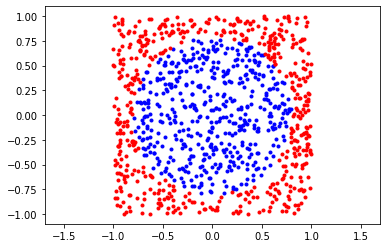

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100):
    data = 2*np.random.rand(n, 2)-1
    label = np.zeros(n)
    label[np.linalg.norm(data, axis=-1)<0.8] = 1
    return data, label

data, label = generate_data(1000)
plt.figure()
plt.plot(data[label==1, 0], data[label==1, 1], "b.")
plt.plot(data[label==0, 0], data[label==0, 1], "r.")
plt.axis("equal")
plt.show()

(1000,)
[[0.68997448 0.68997448 0.68997448 0.68997448]
 [0.85814894 0.85814894 0.450166   0.450166  ]]
[ 0.05989792 -0.08337012]
[0.51497001 0.47916953]


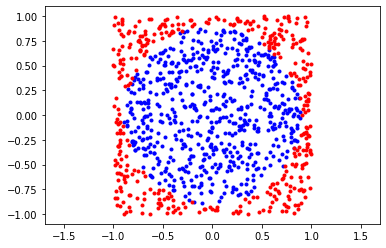

In [34]:
W1 = 0.1*np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = 0.1*np.random.randn(4, 1)
b2 = np.random.randn(1)
W1 = np.array([
    [1,0],
    [0,1],
    [0,-1],
    [-1,0]
]).T
b1 = np.array([0.8, 0.8, 0.8, 0.8])
W2 = np.array([1,1,1,1])
b2 = np.array([-2.7])

data_neu = 20*np.random.rand(1000, 2)-10
data_neu = data

s = lambda x: 1/(1+np.exp(-x))
f = lambda x, W1, b1, W2, b2: s(s(x@W1+b1)@W2+b2).flatten()

pred = f(data_neu, W1, b1, W2, b2)
print(pred.shape)
test = np.array([[0,0],[1,1]])
print(s(test@W1+b1))
print(s(test@W1+b1)@W2+b2)
print(f(test, W1, b1, W2, b2))
plt.figure()
plt.plot(data_neu[pred>=0.5, 0], data_neu[pred>=0.5, 1], "b.")
plt.plot(data_neu[pred<0.5, 0], data_neu[pred<0.5, 1], "r.")
plt.axis("equal")
plt.show()

In [ ]:
#s(s(x@W1+b1)@W2+b2)
#s'(s(x@W1+b1)@W2+b2)